In [1]:
from ThermographyToolSet import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter

In [2]:
csv_folder = "/Users/jaworskj/Desktop/Infrared_thermography/Measurments/Measurment_0_nf/temperature_data"
frames = ReadingDataToStack(csv_folder)

3D Array shape: (1500, 512, 512)


In [3]:
csv_folder = "/Users/jaworskj/Desktop/Infrared_thermography/Measurments/Measurment_0_nf/flux_data"
radiant_frames = ReadingDataToStack(csv_folder)

3D Array shape: (1500, 512, 512)


In [4]:
# Load the .mat file
data = loadmat('/Users/jaworskj/Desktop/Thermography_test_set/archive/Z_004.mat')
# Check keys if you are unsure about the variable name
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'imageArray', 'Fs', 'numberImages'])


In [5]:
thermography_data = data['imageArray']  # Adjust this to your dataset's variable name

# Inspect the shape of the data
print("Data shape:", thermography_data.shape)

Data shape: (256, 320, 1810)


In [6]:
#reorganizing data to match schemat of my prevous measurments
thermography_data=np.transpose(thermography_data,(2,0,1))
thermography_data.shape

(1810, 256, 320)

In [7]:
#clipping to square image
thermography_data=thermography_data[:,:,32:320-32]
thermography_data.shape

(1810, 256, 256)

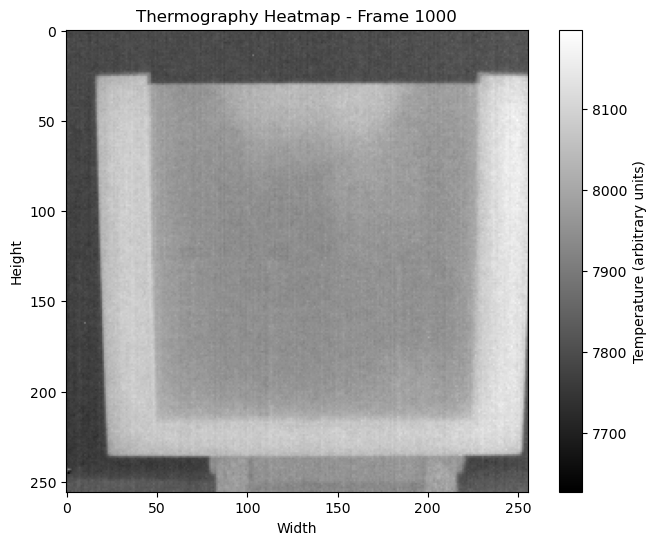

In [8]:
# Select a single frame (e.g., the first frame at index 0)
frame_index =1000
frame = thermography_data[frame_index,: , :]

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(frame, cmap='gray')  # Use 'hot' colormap for thermal data
plt.colorbar(label='Temperature (arbitrary units)')
plt.title(f"Thermography Heatmap - Frame {frame_index}")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [9]:
phasegrame_data=phasegram(thermography_data)

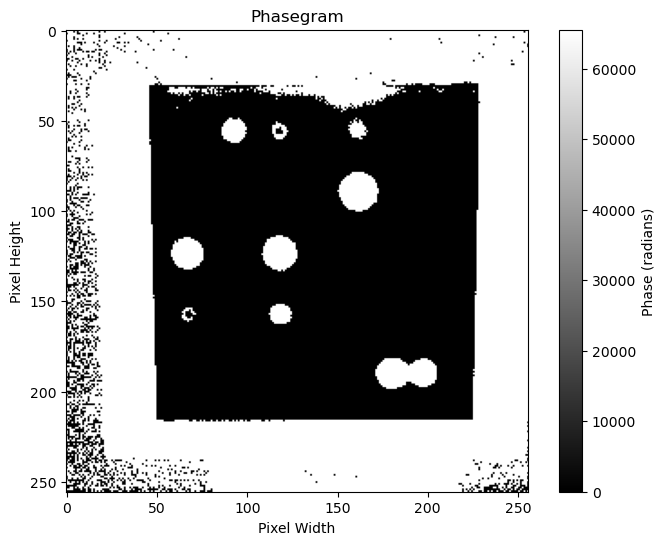

In [10]:
plt.figure(figsize=(8,6))
plt.imshow(phasegrame_data[5],cmap='gray')
plt.colorbar(label='Phase (radians)')
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.title("Phasegram")
plt.show()

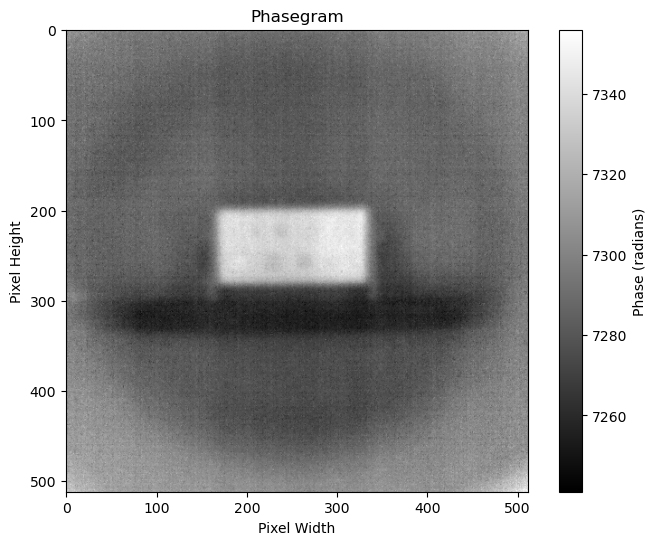

In [11]:
plt.figure(figsize=(8,6))
plt.imshow(radiant_frames[700],cmap='gray')
plt.colorbar(label='Phase (radians)')
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.title("Phasegram")
plt.show()

In [12]:
radiant_phase=phasegram(radiant_frames)

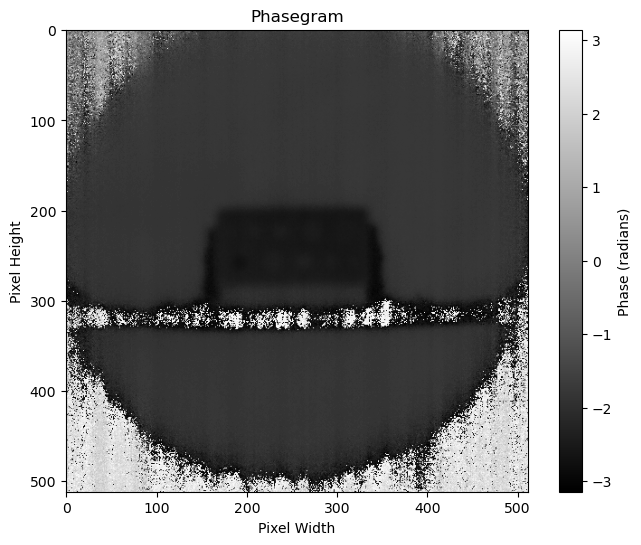

In [63]:
plt.figure(figsize=(8,6))
plt.imshow(radiant_phase[1],cmap='gray')
plt.colorbar(label='Phase (radians)')
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.title("Phasegram")
plt.show()